In [1]:
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
model = Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [3]:
train_datagen = image.ImageDataGenerator(rescale = 1./255,
                                         shear_range = 0.2,
                                         horizontal_flip = True,
                                         zoom_range = 0.2)

val_datagen = image.ImageDataGenerator(rescale=1./255)

In [4]:
training_data = train_datagen.flow_from_directory('../Internship/data/covid/TRAIN/',
                                                  target_size=(224,224),
                                                  class_mode='binary',
                                                  batch_size=32)

Found 120 images belonging to 2 classes.


In [5]:
training_data.class_indices

{'COVID': 0, 'NORMAL': 1}

In [6]:
val_data = val_datagen.flow_from_directory('../Internship/data/covid/VAL',target_size=(224,224),class_mode='binary',batch_size=32)

Found 94 images belonging to 2 classes.


In [7]:
import visualkeras
from PIL import ImageFont
from tensorflow.keras.utils import plot_model

In [8]:
plot_model(model, show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [9]:
font = ImageFont.truetype("arial.ttf", 32)

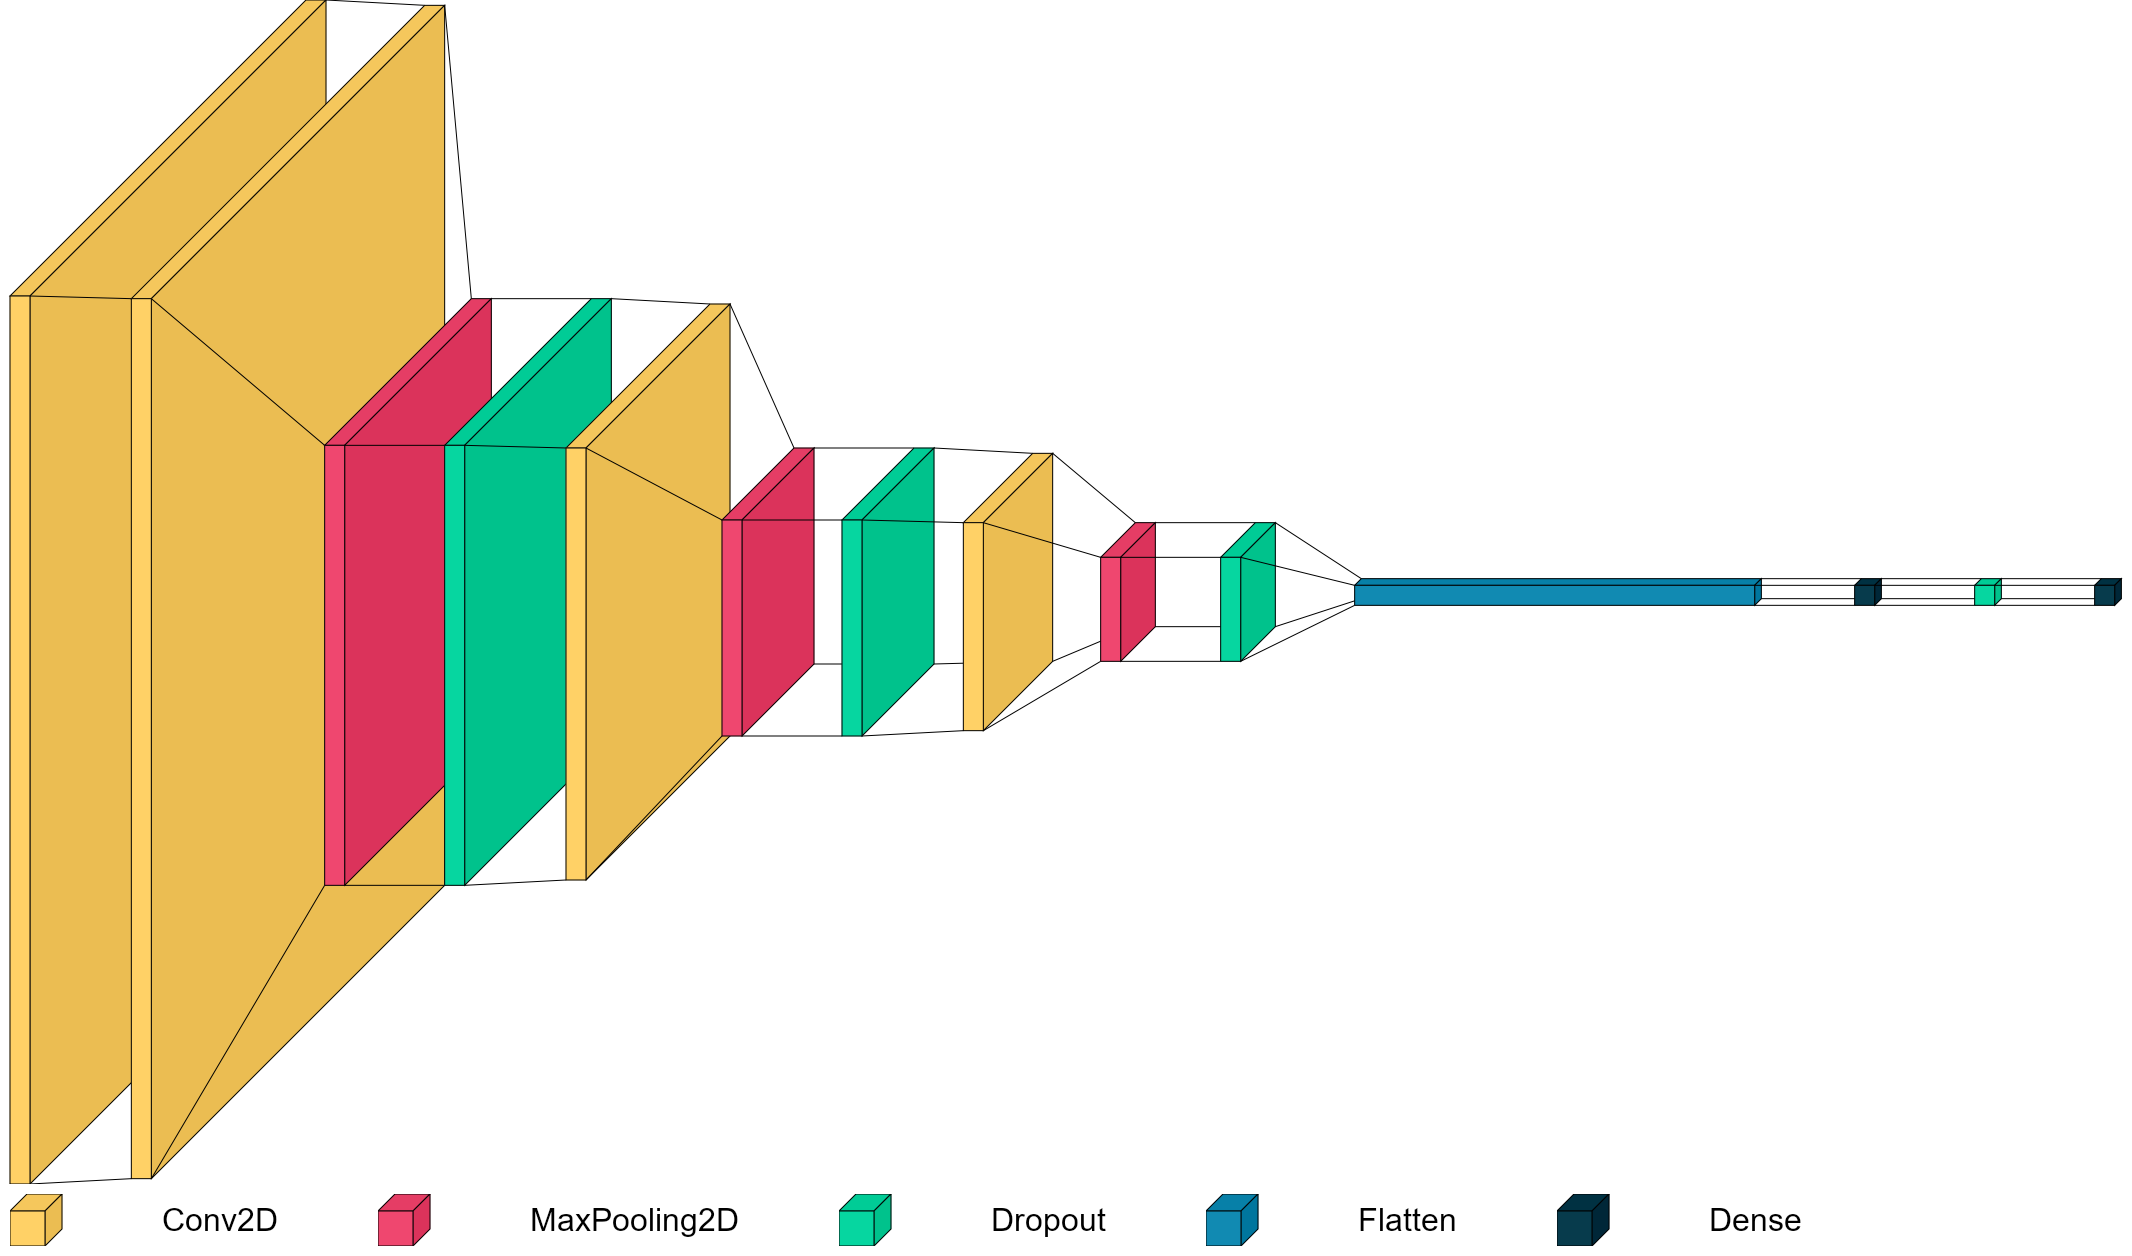

In [10]:
visualkeras.layered_view(model, legend=True, font=font, spacing=100)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [12]:
e = 20
hist = model.fit_generator(training_data,
                    steps_per_epoch=3,
                    epochs = e,
                    validation_data = val_data,
                    validation_steps =2)
model.save('../Internship/models/covid-19_model.h5')

C:\Users\Siddhanth\anaconda3\envs\ev_2\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
3/3 [==============================] - 18s 4s/step - loss: 1.6708 - accuracy: 0.5682 - val_loss: 0.6960 - val_accuracy: 0.6875
Epoch 2/20
3/3 [==============================] - 6s 2s/step - loss: 1.8064 - accuracy: 0.3977 - val_loss: 0.7120 - val_accuracy: 0.2812
Epoch 3/20
3/3 [==============================] - 7s 3s/step - loss: 0.6764 - accuracy: 0.4886 - val_loss: 0.6631 - val_accuracy: 0.7188
Epoch 4/20
3/3 [==============================] - 7s 2s/step - loss: 0.6672 - accuracy: 0.6023 - val_loss: 0.6599 - val_accuracy: 0.7344
Epoch 5/20
3/3 [==============================] - 7s 3s/step - loss: 0.6261 - accuracy: 0.6477 - val_loss: 0.6402 - val_accuracy: 0.9219
Epoch 6/20
3/3 [==============================] - 7s 3s/step - loss: 0.6302 - accuracy: 0.6477 - val_loss: 0.5866 - val_accuracy: 0.9062
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.5499 - accuracy: 0.7273 - val_loss: 0.5045 - val_accuracy: 0.9062
Epoch 8/20
3/3 [========================

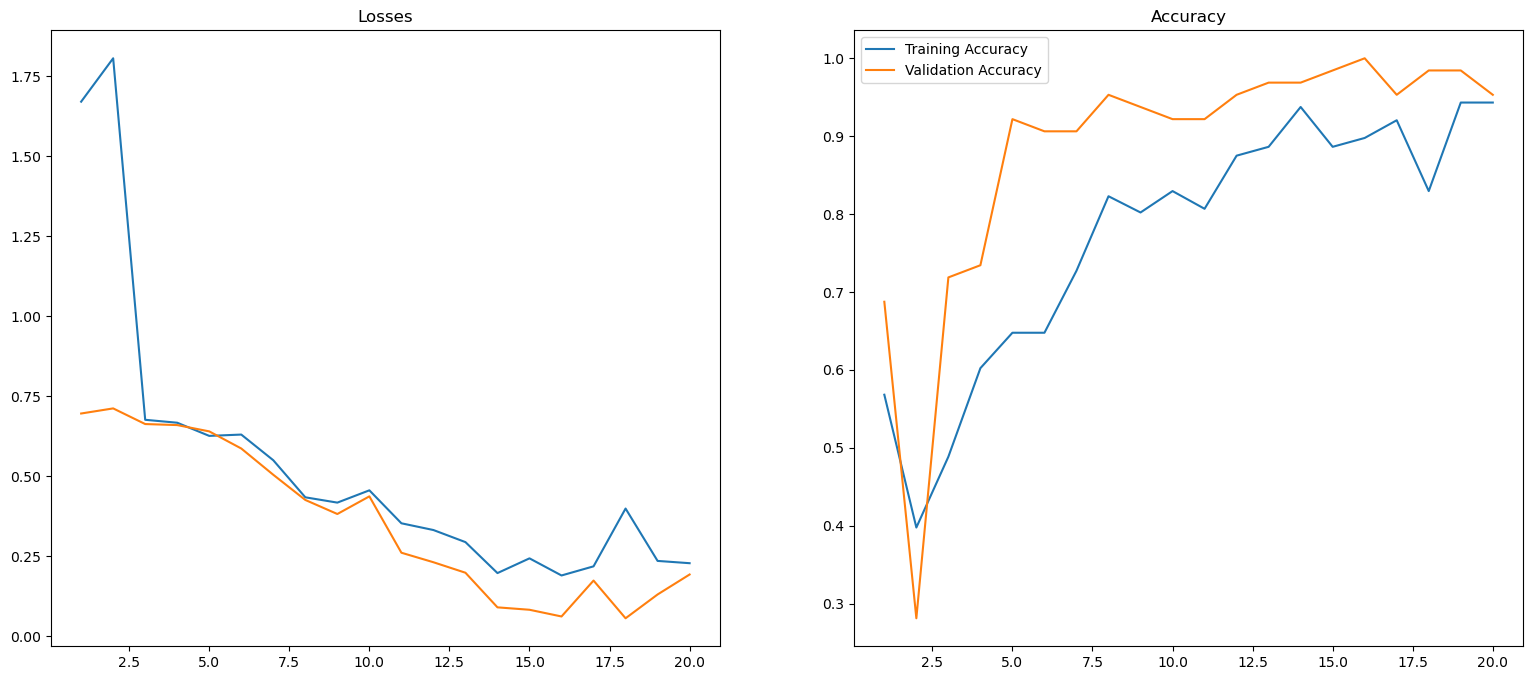

In [13]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

epochs = range(1,e+1)

plt.figure(figsize=(19,8))
plt.subplot(121)
plt.plot(epochs,train_loss,label='Training loss')
plt.plot(epochs,val_loss,label='Validation Loss')
plt.title('Losses')

plt.subplot(122)
plt.plot(epochs,acc,label='Training Accuracy')
plt.plot(epochs,val_acc,label='Validation Accuracy')
plt.title('Accuracy')

plt.legend()


In [14]:
model.evaluate_generator(training_data)

C:\Users\Siddhanth\anaconda3\envs\ev_2\lib\site-packages\keras\engine\training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.2561905086040497, 0.9416666626930237]

In [15]:
model.evaluate_generator(val_data)

[0.1932544708251953, 0.957446813583374]

<Axes: >

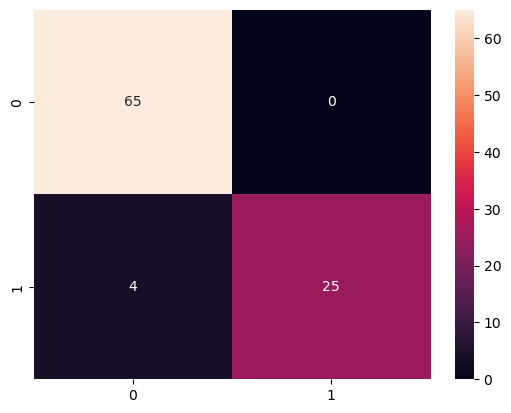

In [20]:
import cv2
import os
import seaborn as sns
from tensorflow.keras.models import load_model

TP = 0
TN = 0
FP = 0
FN = 0

model = load_model('../Internship/models/covid-19_model.h5')

covid_images = os.listdir('../Internship/data/covid/TEST/COVID')
normal_images = os.listdir('../Internship/data/covid/TEST/NORMAL')

for i in covid_images:
    img = cv2.imread('../Internship/data/covid/TEST/COVID/'+i)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    img = img/255.0
    pred = model.predict(img)
    if pred<0.5:
        TP+=1
    else:
        FN+=1

for i in normal_images:
    img = cv2.imread('../Internship/data/covid/TEST/NORMAL/'+i)
    img = cv2.resize(img, (224, 224))
    img = img.reshape(1, 224, 224, 3)
    img = img/255.0
    pred = model.predict(img)
    if pred>0.5:
        TN+=1
    else:
        FP+=1
        
sns.heatmap([[TP,FP],[FN,TN]],annot=True)